# IMUIF Samna

This implementation will feed the input from the PC and make it possible to read the output of IMUIF module.
Since it's not directly possible to read the output of IMUIF module, we'll implement a dummy network that will return whatever we feed it.

In [1]:
import numpy as np
from rockpool.timeseries import TSEvent, TSContinuous
from rockpool.devices.xylo.imu.preprocessing.identity_net import IdentityNet

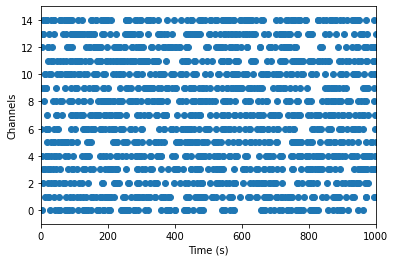

In [2]:
# Create a random poisson spike train
input_spike_train = np.random.rand(1000,15) < 0.1
TSEvent.from_raster(input_spike_train).plot()

In [3]:
from rockpool.devices.xylo.imu import xylo_imu_devkit_utils as putils

# - Find and connect to a Xylo IMU HDK
xylo_hdk_nodes = putils.find_xylo_imu_boards()
print(xylo_hdk_nodes)

if len(xylo_hdk_nodes) == 0:
    assert False, 'This tutorial requires a connected Xylo IMU HDK to demonstrate.'
else:
    db = xylo_hdk_nodes[0]

In [4]:
mod = IdentityNet(device=db)

Using XyloSamna


In [11]:
# - Run simulation
mod.reset_state()
spike_out, state, record_dict = mod.evolve(input_spike_train, record=True)

In [12]:
np.all(spike_out == input_spike_train)

True

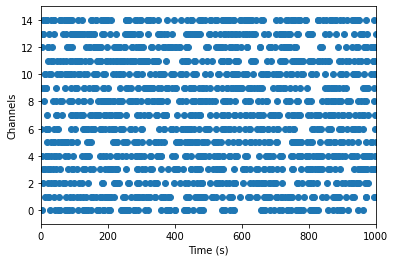

In [13]:
TSEvent.from_raster(spike_out).plot()